<a href="https://colab.research.google.com/github/valogonor/DS-Sprint-01-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [16]:
import pandas as pd
patient_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
columns = ['age', 'operation_year', 'nodes_num', 'survival']
patient_data = pd.read_csv(patient_data_url, header=None, names=columns)
len(patient_data) # number of observations is what it's supposed to be

306

In [13]:
# I looked at the raw data, and there were no question marks or other symbols indicating missing values.
patient_data.isna().sum()

age               0
operation_year    0
nodes_num         0
survival          0
dtype: int64

In [19]:
patient_data.survival.replace(2, 0, inplace=True)
patient_data.head(10)

,age,operation_year,nodes_num,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [20]:
patient_data.describe()

,age,operation_year,nodes_num,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [72]:
node_bins = pd.cut(patient_data['nodes_num'], 5)
ct = pd.crosstab(node_bins, patient_data['survival'], normalize='index')
print(ct.mean())
ct
# help(pd.crosstab)

survival
0    0.568085
1    0.431915
dtype: float64


survival,0,1
nodes_num,,
"(-0.052, 10.4]",0.218045,0.781955
"(10.4, 20.8]",0.576923,0.423077
"(20.8, 31.2]",0.545455,0.454545
"(31.2, 41.6]",1.000000,0.000000
"(41.6, 52.0]",0.500000,0.500000


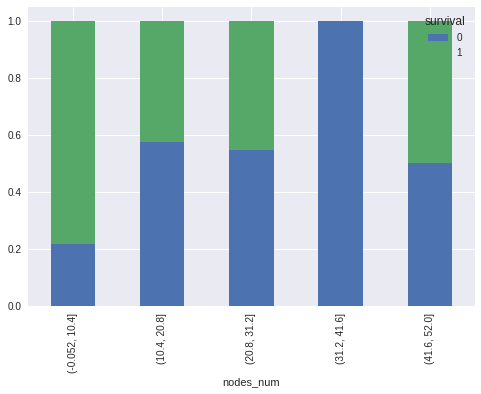

In [46]:
ct.plot(kind='bar', stacked=True);

In [71]:
age_bins = pd.cut(patient_data['age'], 5)
ct2 = pd.crosstab(age_bins, patient_data['survival'], normalize='index')
print(ct2.mean())
ct2

survival
0    0.258385
1    0.741615
dtype: float64


survival,0,1
age,,
"(29.947, 40.6]",0.093023,0.906977
"(40.6, 51.2]",0.313131,0.686869
"(51.2, 61.8]",0.281250,0.718750
"(61.8, 72.4]",0.271186,0.728814
"(72.4, 83.0]",0.333333,0.666667


In [58]:
ct3 = pd.crosstab(age_bins, node_bins)
ct3

nodes_num,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
age,,,,,
"(29.947, 40.6]",38,3,2,0,0
"(40.6, 51.2]",85,11,2,0,1
"(51.2, 61.8]",83,7,4,1,1
"(61.8, 72.4]",51,5,3,0,0
"(72.4, 83.0]",9,0,0,0,0


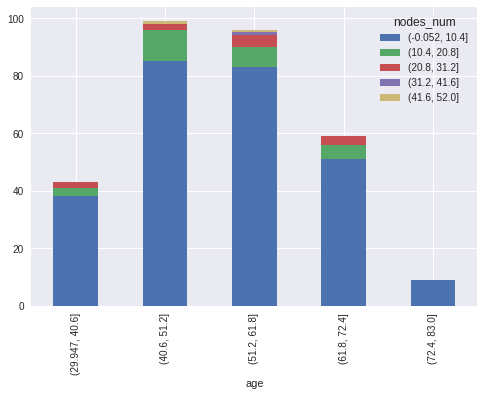

In [59]:
ct3.plot(kind='bar', stacked=True);

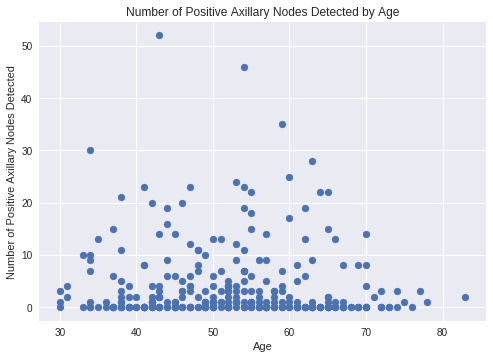

In [66]:
import matplotlib.pyplot as plt
x = patient_data.age
y = patient_data.nodes_num
plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Number of Positive Axillary Nodes Detected')
plt.title('Number of Positive Axillary Nodes Detected by Age')
plt.show()

In [90]:
year_bins = pd.cut(patient_data['operation_year'], 6)
ct4 = pd.crosstab(patient_data['operation_year'], patient_data['survival'], normalize='index')
print(ct4.mean())
ct4

survival
0    0.26558
1    0.73442
dtype: float64


survival,0,1
operation_year,,
58,0.333333,0.666667
59,0.333333,0.666667
60,0.142857,0.857143
61,0.115385,0.884615
62,0.304348,0.695652
63,0.266667,0.733333
64,0.258065,0.741935
65,0.464286,0.535714
66,0.214286,0.785714


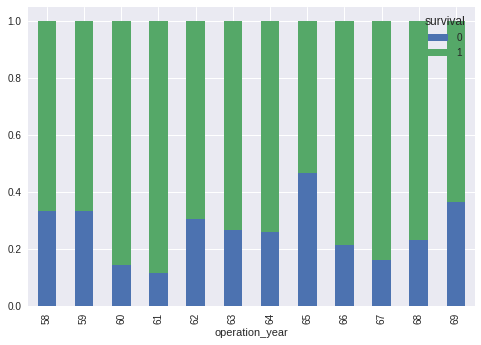

In [86]:
ct4.plot(kind='bar', stacked=True);

In [88]:
pd.crosstab([age_bins, node_bins], patient_data['survival'] , normalize='index')

survival                              0         1
age            nodes_num                         
(29.947, 40.6] (-0.052, 10.4]  0.078947  0.921053
               (10.4, 20.8]    0.000000  1.000000
               (20.8, 31.2]    0.500000  0.500000
               (31.2, 41.6]    0.000000  0.000000
               (41.6, 52.0]    0.000000  0.000000
(40.6, 51.2]   (-0.052, 10.4]  0.258824  0.741176
               (10.4, 20.8]    0.545455  0.454545
               (20.8, 31.2]    1.000000  0.000000
               (31.2, 41.6]    0.000000  0.000000
               (41.6, 52.0]    1.000000  0.000000
(51.2, 61.8]   (-0.052, 10.4]  0.228916  0.771084
               (10.4, 20.8]    0.714286  0.285714
               (20.8, 31.2]    0.500000  0.500000
               (31.2, 41.6]    1.000000  0.000000
               (41.6, 52.0]    0.000000  1.000000
(61.8, 72.4]   (-0.052, 10.4]  0.215686  0.784314
               (10.4, 20.8]    0.800000  0.200000
               (20.8, 31.2]    0.333333  0.666667
               (31.2, 41.6]    0.000000  0.000000
               (41.6, 52.0]    0.000000  0.000000
(72.4, 83.0]   (-0.052, 10.4]  0.333333  0.666667
               (10.4, 20.8]    0.000000  0.000000
               (20.8, 31.2]    0.000000  0.000000
               (31.2, 41.6]    0.000000  0.000000
               (41.6, 52.0]    0.000000  0.000000

In [92]:
pd.crosstab([age_bins, year_bins], patient_data['survival'] , normalize='index')

survival                                0         1
age            operation_year                      
(29.947, 40.6] (57.989, 59.833]  0.090909  0.909091
               (59.833, 61.667]  0.000000  1.000000
               (61.667, 63.5]    0.000000  1.000000
               (63.5, 65.333]    0.000000  1.000000
               (65.333, 67.167]  0.285714  0.714286
               (67.167, 69.0]    0.500000  0.500000
(40.6, 51.2]   (57.989, 59.833]  0.428571  0.571429
               (59.833, 61.667]  0.062500  0.937500
               (61.667, 63.5]    0.315789  0.684211
               (63.5, 65.333]    0.409091  0.590909
               (65.333, 67.167]  0.250000  0.750000
               (67.167, 69.0]    0.400000  0.600000
(51.2, 61.8]   (57.989, 59.833]  0.250000  0.750000
               (59.833, 61.667]  0.157895  0.842105
               (61.667, 63.5]    0.375000  0.625000
               (63.5, 65.333]    0.400000  0.600000
               (65.333, 67.167]  0.142857  0.857143
               (67.167, 69.0]    0.363636  0.636364
(61.8, 72.4]   (57.989, 59.833]  0.428571  0.571429
               (59.833, 61.667]  0.333333  0.666667
               (61.667, 63.5]    0.375000  0.625000
               (63.5, 65.333]    0.250000  0.750000
               (65.333, 67.167]  0.133333  0.866667
               (67.167, 69.0]    0.000000  1.000000
(72.4, 83.0]   (57.989, 59.833]  1.000000  0.000000
               (59.833, 61.667]  0.000000  0.000000
               (61.667, 63.5]    0.000000  1.000000
               (63.5, 65.333]    0.666667  0.333333
               (65.333, 67.167]  0.000000  1.000000
               (67.167, 69.0]    0.000000  1.000000

In [93]:
pd.crosstab(age_bins, year_bins, normalize='index')

operation_year,"(57.989, 59.833]","(59.833, 61.667]","(61.667, 63.5]","(63.5, 65.333]","(65.333, 67.167]","(67.167, 69.0]"
age,,,,,,
"(29.947, 40.6]",0.255814,0.232558,0.162791,0.139535,0.162791,0.046512
"(40.6, 51.2]",0.212121,0.161616,0.191919,0.222222,0.161616,0.050505
"(51.2, 61.8]",0.166667,0.197917,0.166667,0.208333,0.145833,0.114583
"(61.8, 72.4]",0.237288,0.152542,0.135593,0.135593,0.254237,0.084746
"(72.4, 83.0]",0.111111,0.000000,0.333333,0.333333,0.111111,0.111111


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

Among people of similar ages, people are more likely to survive with later operation years. Both the number of nodes and age have a negative correlation with survival. Older people tended to have operations in later years.